In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('S02-hw-dataset.csv')
df.head()

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [87]:
df.describe()

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


In [88]:
print(df.isna().mean() * 100) # пропуски
print(df.duplicated().sum()) # дубликаты

user_id      0.000000
age          4.878049
country      0.000000
purchases    0.000000
revenue      0.000000
dtype: float64
1


In [89]:
df[(df['purchases'] < 0)]

,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


In [90]:
df[((df['revenue'] <= 0) & (df['purchases'] > 0))]

,user_id,age,country,purchases,revenue
10,11,24.0,US,4,0


In [91]:
df[(~df['age'].between(15, 100)) | (df['age'] % 1 != 0)]

,user_id,age,country,purchases,revenue
4,5,NaN,DE,6,1296
5,6,120.0,FR,-1,785
12,13,NaN,US,9,630
20,21,5.0,RU,8,1488


In [92]:
'''
Так как данных мало, то искать выбросы сложно.
В датасете есть один дубликат. 
В столбце age есть два NaN значения и две явно ошибочных записи. 
В столбце purchases есть отрицательное значение.
И одна запись имеет нулевой доход, с ненулевой покупкой.
'''

'\nТак как данных мало, то искать выбросы сложно.\nВ датасете есть один дубликат. \nВ столбце age есть два NaN значения и две явно ошибочных записи. \nВ столбце purchases есть отрицательное значение.\nИ одна запись имеет нулевой доход, с ненулевой покупкой.\n'

In [93]:
# очистка/замена данных
df = df.drop_duplicates()
df['age'] = df['age'].fillna(int(df['age'].median()))
df = df[df['age'].between(14, 110)]
df.loc[df['purchases'] < 0, 'purchases'] = 0
df = df[~((df['revenue'] == 0) & (df['purchases'] > 0))]

In [94]:
df.describe()

,user_id,age,purchases,revenue
count,37.000000,37.000000,37.000000,37.000000
mean,21.135135,35.594595,4.864865,833.459459
std,11.801982,11.116703,2.605146,619.474894
min,1.000000,18.000000,0.000000,0.000000
25%,12.000000,26.000000,3.000000,432.000000
50%,22.000000,33.000000,5.000000,693.000000
75%,31.000000,45.000000,7.000000,1115.000000
max,40.000000,57.000000,11.000000,2475.000000


In [97]:
print(df['country'].value_counts())

country
FR    11
RU    11
US     7
DE     6
CN     2
Name: count, dtype: int64


In [110]:
df['age_group'] = pd.cut(df['age'], bins=[18, 28, 37, 47, 57]).round(3)

group = df.groupby('age_group', observed=True).agg({
                    'purchases': ['count', 'sum', 'mean'],
                    'revenue': ['sum', 'mean']
                    })
group.head()

purchases               revenue             
              count sum      mean     sum         mean
age_group                                             
(18, 28]         11  47  4.272727    6841   621.909091
(28, 37]         11  70  6.363636   13163  1196.636364
(37, 47]          8  29  3.625000    6150   768.750000
(47, 57]          6  30  5.000000    3580   596.666667

In [112]:
group_country = df.groupby('country').agg({
                                'age': 'mean',
                                'purchases': ['count', 'sum', 'mean'],
                                'revenue': ['sum', 'mean']
                            }).round(3)

group_country.head()

age purchases            revenue        
           mean     count sum   mean     sum    mean
country                                             
CN       24.000         2   9  4.500    2108  1054.0
DE       34.333         6  39  6.500    8673  1445.5
FR       39.545        11  52  4.727    7326   666.0
RU       32.909        11  47  4.273    8272   752.0
US       38.000         7  33  4.714    4459   637.0

In [113]:
'''
Преобладают данные покупателей из Франции и России в возрасте от 18 до 37.
Самый большой доход в группе 28-37 лет.
В Германии самый большое срднее значение дохода.
А в Китае малое количество покупок при довольно большом доходе. 
    И наименьший средний возраст по странам
'''

'\nПреобладают данные покупателей из Франции и России в возрасте от 18 до 37.\nВ Китае самый большое срднее значение дохода. \n   - какие категории доминируют,\n   - как отличаются группы по средним значениям,\n   - есть ли неожиданные эффекты.\n\n'

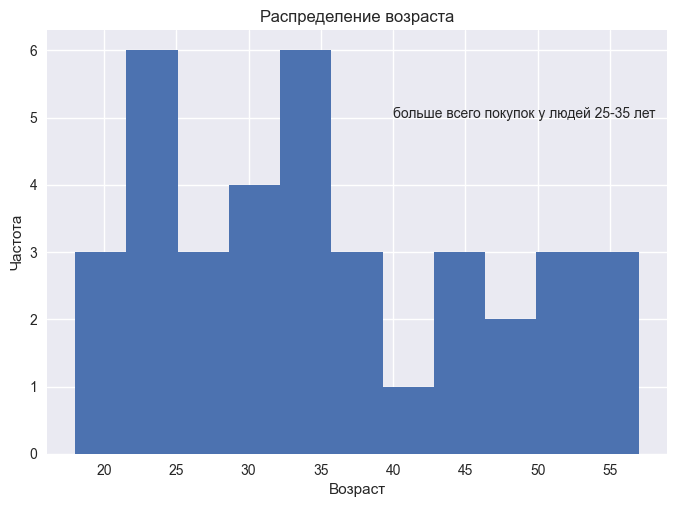

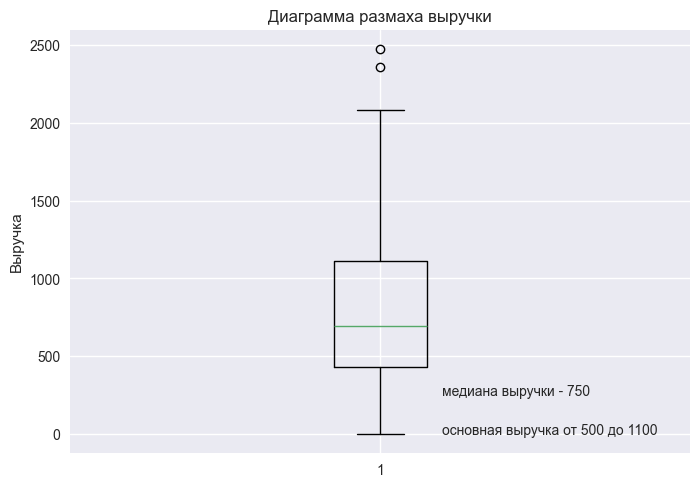

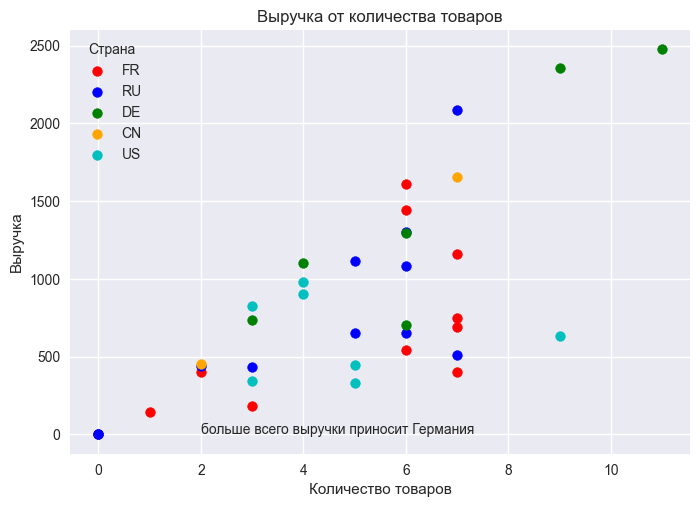

In [175]:
plt.hist(df['age'].dropna(), bins=11)
plt.title('Распределение возраста')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.text(x=40, y=5, s='больше всего покупок у людей 25-35 лет')
plt.savefig('figures/histogram.png')
plt.show()

plt.boxplot(df['revenue'])
plt.title('Диаграмма размаха выручки')
plt.ylabel('Выручка')
plt.text(x=1.1, y=250, s='медиана выручки - 750')
plt.text(x=1.1, y=0, s='основная выручка от 500 до 1100')
plt.savefig('figures/boxplot.png')
plt.show()

countries = df['country'].unique().tolist()
colors = ['r', 'b', 'g', 'orange', 'c']
for i, country in enumerate(countries):
    country_data = df[df['country'] == country]
    plt.scatter(country_data['purchases'], 
                country_data['revenue'],
                color=colors[i],
                label=country,
                s=50)
plt.title('Выручка от количества товаров')
plt.xlabel('Количество товаров')
plt.ylabel('Выручка')
plt.text(x=2, y=1, s='больше всего выручки приносит Германия')
plt.legend(title='Страна')
plt.savefig('figures/scatter.png')
plt.show()